Chapter 15

# 估算体积
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码通过蒙特卡罗方法和数值积分来估算三维函数 $f(x, y) = 2 - x^2 - y^2$ 在区域 $[-1, 1] \times [-1, 1]$ 上方至 $z = 0$ 平面之间的体积。具体过程如下：

1. **函数定义与网格生成**：首先定义函数 $f(x, y) = 2 - x^2 - y^2$，并生成 $x$ 和 $y$ 的网格。该函数在 $x$ 和 $y$ 范围为 $[-1, 1]$ 时构成一个抛物面，其高度从 $2$ 减小至 $0$。

2. **绘制函数曲面**：利用三维网格 $(X, Y)$ 计算 $Z = f(X, Y)$，并使用 `plot_wireframe` 函数绘制该函数的曲面，以展示抛物面的形状。

3. **生成随机样本点**：在 $x \in [-1, 1]$ 和 $y \in [-1, 1]$ 范围内生成 $5000$ 个 $(x_{\text{rand}}, y_{\text{rand}})$ 随机点，以及 $z_{\text{rand}} \in [0, 2]$ 随机点。该随机点集合表示一个立方体内的均匀分布。

4. **判断样本点位置**：判断每个 $(x_{\text{rand}}, y_{\text{rand}}, z_{\text{rand}})$ 是否位于曲面 $z = f(x, y)$ 下方。如果满足 $z_{\text{rand}} < f(x_{\text{rand}}, y_{\text{rand}})$，则该点位于曲面下方，用蓝点标记；否则在曲面上方，用红点标记。

5. **估算体积**：蒙特卡罗体积估算公式为：
   $$
   \text{估计体积} = \frac{\text{曲面下方的点数}}{\text{总点数}} \times 8
   $$
   其中 $8$ 是包含随机点的立方体体积 $(2 \times 2 \times 2)$，而 $\frac{\text{曲面下方的点数}}{\text{总点数}}$ 为该体积中曲面下方的比例。

6. **数值积分验证**：利用 `scipy.integrate.dblquad` 计算 $f(x, y)$ 在 $x, y \in [-1, 1]$ 的精确积分值，从而得到真实的体积，以对比蒙特卡罗方法估算的准确性。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from mpl_toolkits.mplot3d import axes3d  # 导入3D绘图库

In [2]:
# 定义函数f(x,y) = 2 - x^2 - y^2
def f(x, y):
    return 2 - x**2 - y**2  # 计算曲面高度

In [3]:
# 定义x的取值范围
x = np.arange(-1, 1, 0.1)  # 在范围[-1,1)内生成步长为0.1的x值
[X, Y] = np.meshgrid(x, x)  # 生成二维网格
Z = f(X, Y)  # 计算网格上对应的Z值

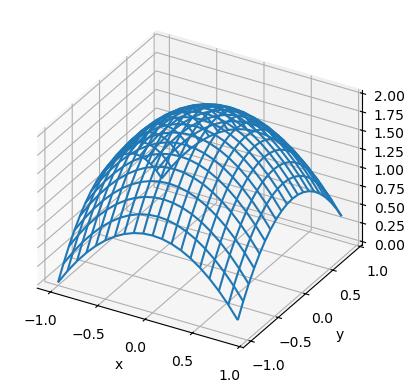

In [4]:
# 创建绘图窗口
fig = plt.figure()  # 创建图形窗口
ax = fig.add_subplot(projection='3d')  # 添加3D子图
ax.plot_wireframe(X, Y, Z)  # 绘制曲面的网格线
ax.set_xlabel('x')  # 设置x轴标签
ax.set_ylabel('y')  # 设置y轴标签
ax.set_zlabel('z')  # 设置z轴标签
ax.set_proj_type('ortho')
plt.show()  # 显示图像

In [5]:
# 设置随机点数量
num_rnd = 5000  # 设置5000个随机点
x_rand = 2 * np.random.random(num_rnd) - 1  # 在范围[-1,1)内生成随机的x坐标
y_rand = 2 * np.random.random(num_rnd) - 1  # 在范围[-1,1)内生成随机的y坐标
z_rand = 2 * np.random.random(num_rnd)  # 在范围[0,2)内生成随机的z坐标

In [6]:
# 获取低于曲面的点索引
ind_below = np.where(z_rand < f(x_rand, y_rand))  # 找到位于曲面以下的点
ind_above = np.where(z_rand >= f(x_rand, y_rand))  # 找到位于曲面以上的点

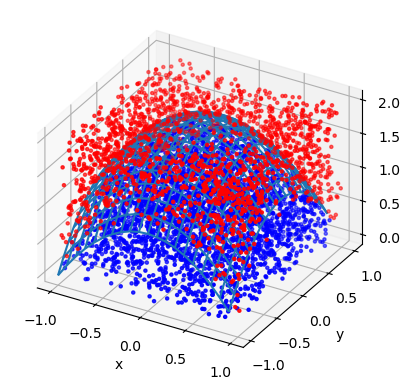

In [7]:
# 可视化随机点的分布
fig = plt.figure()  # 创建图形窗口
ax = fig.add_subplot(projection='3d')  # 添加3D子图
ax.scatter3D(x_rand[ind_below], y_rand[ind_below], z_rand[ind_below], color="b", marker='.')  # 绘制低于曲面的点（蓝色）
ax.scatter3D(x_rand[ind_above], y_rand[ind_above], z_rand[ind_above], color="r", marker='.')  # 绘制高于曲面的点（红色）
ax.plot_wireframe(X, Y, Z)  # 再次绘制曲面的网格线
ax.set_xlabel('x')  # 设置x轴标签
ax.set_ylabel('y')  # 设置y轴标签
ax.set_zlabel('z')  # 设置z轴标签
ax.set_proj_type('ortho')
plt.show()  # 显示图像

In [8]:
# 估算体积并赋值给变量
estimated_volume = np.sum(z_rand < f(x_rand, y_rand)) / num_rnd * 8  # 通过蒙特卡洛方法估算体积
print(estimated_volume)  # 输出估算的体积

5.3376


In [9]:
# 导入积分库
from scipy import integrate  # 导入积分库

In [10]:
# 计算双重积分
double_integral = integrate.dblquad(f, -1, 1, lambda x: -1, lambda x: 1)  # 使用双重积分计算精确体积
print(double_integral[0])  # 输出精确计算的体积

5.333333333333333
